Text(0, 0.5, 'Amplitude')

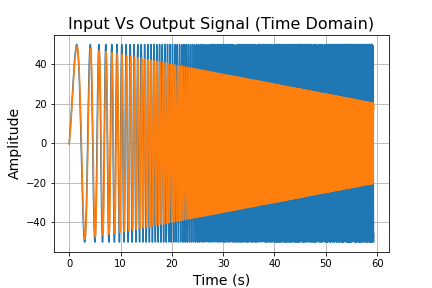

In [203]:
#Import necessary libraries
import matplotlib.pyplot as plt #For plotting 
import numpy as np #Numerical Computation Library, usefull for working with vectors and matrices
import pandas as pd #Tabular data analysis library, usefull for importing text and working with table structured data
import scipy.fftpack #FFT funcitonality

#Enables plotting widget in jupyter notebook
%matplotlib widget 

#Import Data from CSV using Pandas. Data needs to have 3 columns and no header information. 
#Columns should be organized as time, input signal, measured signal
#Assigns name to columns
data = pd.read_csv(r'C:\Users\Public\Documents\Dewesoft\Exports\Test.txt', names=['time','input_signal','measured_signal'])

#Plot data in time domain on same axis
dwFig, dwAx = plt.subplots()
dwAx.plot(data['time'], data['input_signal'], label="Input Signal")
dwAx.plot(data['time'], data['measured_signal'], label ="Measued Signal")
dwAx.grid()
dwAx.set_title("Input Vs Output Signal (Time Domain)", size=16)
dwAx.set_xlabel("Time (s)", size=14)
dwAx.set_ylabel("Amplitude", size=14)




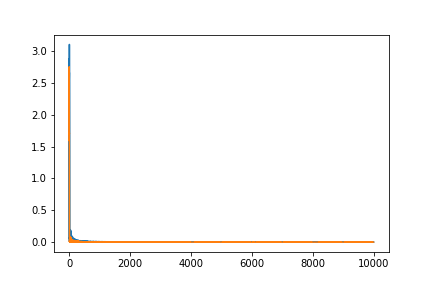

In [163]:
# Get number of sample points from data
N = len(data['input_signal'])

#Data Acquisition Sample Rate
sampleRate = 20000.0

#Data Acquisition Period
T = 1.0 / sampleRate

#Convert pandas series to numpy vectors
x = data['time'].to_numpy()
y1 = data['input_signal'].to_numpy()
y2 = data['measured_signal'].to_numpy()

#Compute fftp of signals and generate frequency axis
yf1 = scipy.fftpack.fft(y1)
yf2 = scipy.fftpack.fft(y2)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

#Plot positive normalized real signals in frequency domain
fig4, ax4 = plt.subplots()
ax4.plot(xf, 2.0/N * np.abs(yf1[:N//2]))
ax4.plot(xf, 2.0/N * np.abs(yf2[:N//2]))

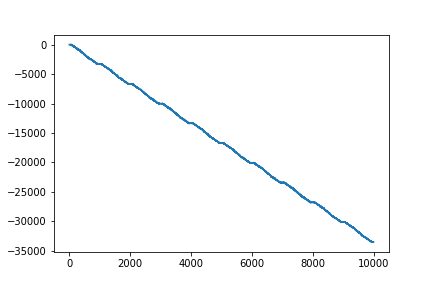

In [194]:
#Extract normalized real magnitudes from fft 
mag1 = (np.real(yf1)[:N//2])*(2.0/N)
mag2 = (np.real(yf2)[:N//2])*(2.0/N)

#Compute signal loss of output to input
mags = 20*np.log10(abs(mag2/mag1))

#Plot signal loss
fig5, ax5 = plt.subplots()
ax5.plot(xf, mags)

#Extract normalized real angles from complex argument of fft
angle1 = np.angle(yf1[:N//2]*(2.0/N))
angle2 = np.angle(yf2[:N//2]*(2.0/N))

#Calculate phase shift as difference of input and output and unwrap phases
phaseShift = np.unwrap(angle1-angle2)

#Plot phase shift in frequency domain
fig6, ax6 = plt.subplots()
ax6.plot(xf, phaseShift)

